In [1]:
import pandas as pd
import numpy as np
import pandas_profiling 
import matplotlib.pyplot as plt
import pickle 

from pandas_datareader import data as pdr
import fix_yahoo_finance as yf
yf.pdr_override()

%matplotlib inline
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:95% !important; }</style>"))


In [4]:
with open('./data/market_data_pd.pkl','rb') as f:
    data_all = pickle.load(f)

In [5]:
tickers = data_all.columns.levels[1].values


In [32]:
df = pd.read_csv('./data/div_data/AA.csv',index_col='Record Date')
df.index = pd.to_datetime(df.index)
df.head()

,Dividend Amount,Declared Date,Ex-Date,Dividend Type,Payable Date,Dividend Frequency
Record Date,,,,,,
NaT,-2.424536e-14,2017-07-21,2017-05-04,Discontinued,NaN,Suspend
NaT,-2.424536e-14,2017-07-21,2017-02-10,Omitted,NaN,Quarter
NaT,-2.424536e-14,2017-07-21,2016-11-04,Omitted,NaN,Quarter
NaT,1.339552e+00,2016-10-13,2016-11-01,Stock Split,NaN,None
NaT,3.333330e-01,2016-07-27,2016-10-06,Stock Split,NaN,None


In [30]:
df = pd.DataFrame()
wo_div,w_div = [],[]
splits = {}

for i,ticker in enumerate(tickers):
    try:
        DIVdf = pd.read_csv(f'./data/div_data/{ticker}.csv')
        if DIVdf['Dividend Type'].isin(['Stock Split']).sum():
            t = DIVdf.where(DIVdf['Dividend Type']=='Stock Split')
            vals = t[['Dividend Amount','Ex-Date']][::-1].dropna().values
            #print(vals)
            splits[ticker] = vals
        #w_div.append(ticker)
    except Exception as e:
        wo_div.append(ticker)
    
# w_div = [ticker for ticker in tickers if ticker not in wo_div]


In [33]:
with open('./data/splits.pkl','wb') as f:
    pickle.dump(splits,f)

In [29]:
df = pd.DataFrame()
tdfs = []
for i,ticker in enumerate(w_div):
    try:
        DIVdf = pd.read_csv(f'./data/div_data/{ticker}.csv')
        DIVdf.dropna(inplace=True)
        tdf = DIVdf[['Dividend Amount','Dividend Type']]
        tdf.columns = [f'{ticker}_DA',f'{ticker}_DT']
        tdf.index = pd.to_datetime(DIVdf['Record Date'])
        tdf = tdf.loc[~tdf.index.duplicated(keep='first')]
        tdf.iloc[0]
        tdfs.append(tdf)
        #df = pd.concat([df,tdf],axis=1)
    except Exception as e:
        #print(e)
        print(ticker)

ETFC
FB
LVLT
QRVO
THC
TMUS


In [176]:
ts = np.array([(t.shape[0],t.columns) for t in tdfs])

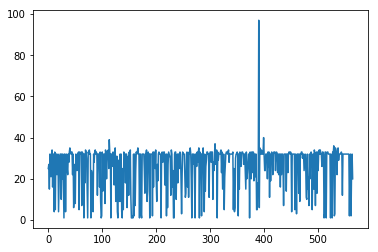

In [178]:
plt.plot(ts[:,0])

# Earnings per share

In [2]:
df = pd.read_csv('./data/eps_data/GOOG.csv',index_col='Announcement Date')
df.index = pd.to_datetime(df.index)
df.dropna(inplace=True)
#df[df['Year/Period'].isin(qs[0])]
df = df[::-1]
df['delta'] = df['Comparable EPS'] - df['Estimate EPS']
df['surprise'] = df['delta']/(df.loc[:,'delta'].rolling(3).std(ddof=1))
#qs = [[str(2010+i)+':Q'+str(j) for i in range(9) ]for j in range(1,5)]

df['Trailing_EPS'] = df['Earnings EPS'].rolling(4).sum()
t = 100*((-df['Earnings EPS'] + df['Earnings EPS'].shift(-1))/df['Earnings EPS'].apply(np.abs)).shift(1).rolling(4).mean()
#t[t<0] = 0
df['Growth'] = t
df

,Comparable EPS,Year/Period,Earnings EPS,Announcement Time,Estimate EPS,delta,surprise,Trailing_EPS,Growth
Announcement Date,,,,,,,,,
2010-01-21,6.1132,2009:Q4,6.1132,16:01,2.832,3.2812,NaN,NaN,NaN
2010-04-15,6.0434,2010:Q1,6.0434,16:01,2.908,3.1354,NaN,NaN,NaN
2010-07-15,5.6944,2010:Q2,5.6944,16:36,2.871,2.8234,12.072309,NaN,NaN
2010-10-14,6.7016,2010:Q3,6.7016,16:35,2.947,3.7546,7.921596,24.5526,NaN
2011-01-20,7.7886,2010:Q4,7.7886,Aft-mkt,3.577,4.2116,5.953045,26.2280,6.747718
2011-04-14,7.0207,2011:Q1,5.4949,Aft-mkt,3.569,3.4517,9.022984,25.6795,-0.329197
2011-07-14,7.6590,2011:Q2,7.6590,17:14,3.402,4.2570,9.409727,27.6441,10.960475
2011-10-13,8.3072,2011:Q3,8.3072,16:01,3.803,4.5042,8.184108,29.2497,8.654398
2012-01-19,8.1975,2011:Q4,8.1975,17:10,4.576,3.6215,7.953013,29.6586,4.269261


In [6]:
epss = {}

for i,ticker in enumerate(tickers):
    EPSdf = pd.read_csv(f'./data/eps_data/{ticker}.csv').dropna()[::-1]
    EPSdf.index = pd.to_datetime(EPSdf['Announcement Date'])# +' '+ EPSdf['Announcement Time'])
    try:
        EPSdf.iloc[0]
        EPSdf = EPSdf.loc[~EPSdf.index.duplicated(keep='first')]
#         EPSdf['delta'] = EPSdf['Comparable EPS'] - EPSdf['Estimate EPS']
#         EPSdf[f'{ticker}_Beat_est'] = (EPSdf['delta']>0).astype(float)
#         EPSdf[f'{ticker}_Beat_last'] = (EPSdf['Comparable EPS']>EPSdf['Comparable EPS'].shift(1)).astype(float)
#         EPSdf[f'{ticker}_SUE'] = EPSdf['delta'] / EPSdf['delta'].expanding(3).std(ddof=0)
        #EPSdf = EPSdf[['Earnings EPS',f'{ticker}_SUE',f'{ticker}_Beat_est',f'{ticker}_Beat_last']]#,'Comparable EPS','Estimate EPS']]
        EPSdf = EPSdf[['Earnings EPS']]
        EPSdf.columns = ['EPS']#,'SUE','Beat_est','Beat_last']
        EPSdf['EPS_L4Q'] = EPSdf['EPS'].rolling(4).sum()
        t = 100*((-EPSdf['EPS'] + EPSdf['EPS'].shift(-1))/EPSdf['EPS'].apply(np.abs)).shift(1).rolling(3).mean()
        EPSdf['Growth'] = t
        EPSdf.drop(['EPS'],axis=1,inplace=True)
        EPSdf.index += pd.Timedelta(hours=16)
        epss[ticker] = (EPSdf.dropna())
        
    except Exception as e:
        print(ticker,e)

DLPH single positional indexer is out-of-bounds
JAVA single positional indexer is out-of-bounds


In [7]:
eps = pd.concat(epss,axis=1)
#eps = eps.ffill().fillna(9999)

In [9]:
with open('./data/eps_data_list.pkl','wb') as f:
    pickle.dump(epss,f)

In [8]:
eps.filter(regex='ADBE.*').dropna().head()

ADBE           
                    EPS_L4Q     Growth
Announcement Date                     
2010-12-20 16:00:00  1.5157  26.712061
2011-03-22 16:00:00  1.7130  15.923614
2011-06-21 16:00:00  1.8520   3.914339
2011-09-20 16:00:00  1.8439  -8.136341
2011-12-15 16:00:00  1.8134   3.653177

In [22]:
.5285+.4580+.4493+.4081

1.8439

In [146]:
#[eps.iloc[:,i:i+2].plot() for i in np.random.choice(4*np.arange(1971//4),10)];

In [22]:
ts = {}

for i,ticker in enumerate(tickers):
    EPSdf = pd.read_csv(f'./data/eps_data/{ticker}.csv').dropna()
    EPSdf.index = pd.to_datetime(EPSdf['Announcement Date'])
    EPSdf = EPSdf.loc[~EPSdf.index.duplicated(keep='first')]  
    ts[ticker] = EPSdf['Announcement Time']

In [26]:
times = pd.concat(ts)

In [32]:
times[times=='Other']

      Announcement Date
NWS   2013-09-20           Other
NWSA  2013-09-20           Other
Name: Announcement Time, dtype: object

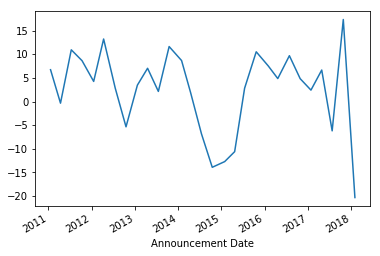

In [8]:
df.Growth.plot()